In [1]:
#from models.dnnlib import tflib as tflib
#from models import dnnlib

import sys
sys.path.insert(0,"./models")

import dnnlib.tflib as tflib
import dnnlib

import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Silence deprecation warnings from TensorFlow 1.13 onwards
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
def seed2vec(G, seed):
  return np.random.RandomState(seed).randn(1, G.z_dim)

In [3]:
tflib.init_tf()
#pkl_ = "./models/pretrained/stylegan2-car-config-f.pkl"
pkl_ = './models/pretrained/stylegan2-ffhq-config-f.pkl'
with open(pkl_, 'rb') as f:
    _G, _D, Gs = pickle.load(f)

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


In [4]:
# Pick latent vector.
rnd = np.random.RandomState(4)
latents = rnd.randn(1, Gs.input_shape[1])

In [5]:
print('input_shape:', Gs.input_shape)

input_shape: [None, 512]


In [6]:
Gs.get_var('dlatent_avg').shape

(512,)

In [7]:
np.random.RandomState(0).randn(*Gs.input_shape[1:]).shape

(512,)

In [8]:
z = np.stack([np.random.RandomState(0).randn(*Gs.input_shape[1:])])

w = Gs.components.mapping.run(z, None)

In [9]:
w.shape

(1, 18, 512)

In [10]:
Gs_syn_kwargs = dnnlib.EasyDict()
Gs_syn_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
Gs_syn_kwargs.randomize_noise = False
Gs_syn_kwargs.minibatch_size = 4

# generating images
all_images = Gs.components.synthesis.run(w, **Gs_syn_kwargs)

In [11]:
all_images[0].shape

(1024, 1024, 3)

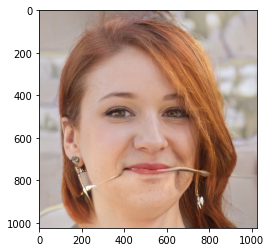

In [12]:
import matplotlib.pyplot as plt
plt.imshow(all_images[0])

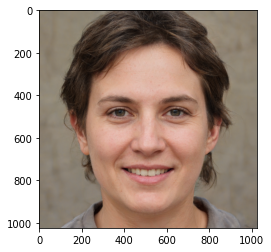

In [13]:
# displaying avg image
avg_image = Gs.components.synthesis.run((w + Gs.get_var('dlatent_avg') - w), **Gs_syn_kwargs)[0]
plt.imshow(avg_image)
